# Teclov Investment Analysis

Project Brief
You work for Teclov, an asset management company. Teclov wants to make
investments in a few companies. The CEO of Teclov wants to understand the global
trends in investments so that she can take the investment decisions effectively.

Business and Data Understanding
Teclov has two minor constraints for investments:
1. It wants to invest between 5 to 15 million USD per round of investment
2. It wants to invest only in English-speaking countries because of the ease of
communication with the companies it would invest in
! For your analysis, consider a country to be English speaking only if English is
one of the official languages in that country
! You may use this list: Click here for a list of countries where English is an
official language.

These conditions will give you sufficient information for your initial analysis. Before
getting to specific questions, let’s understand the problem and the data first.
1. What is the strategy?
Teclov wants to invest where most other investors are investing. This pattern is
often observed among early stage startup investors.

# Teclov’ Business objective

1. Business objective: The objective is to identify the best sectors, countries,
and a suitable investment type for making investments. The overall strategy is
to invest where others are investing, implying that the 'best' sectors and
countries are the ones 'where most investors are investing'.
2. Goals of data analysis: Your goals are divided into three sub-goals:
○ Investment type analysis: Comparing the typical investment amounts
in the venture, seed, angel, private equity etc. so that Teclov can
choose the type that is best suited for their strategy.
○ Country analysis: Identifying the countries which have been the most heavily invested in the past. These will be Teclov’ favourites as well.
○ Sector analysis: Understanding the distribution of investments across
the eight main sectors. (Note that we are interested in the eight 'main sectors' provided in the mapping file. The two files — companies and rounds2 — have numerous sub-sector names; hence, you will need to
map each sub-sector to its main sector.)

3. Sector Classification:
mapping.csv: This file maps the numerous category names in the companies table
(such 3D printing, aerospace, agriculture, etc.) to eight broad sector names. The
purpose is to simplify the analysis into eight sector buckets, rather than trying to
analyse hundreds of them.


# Problem solving methodology

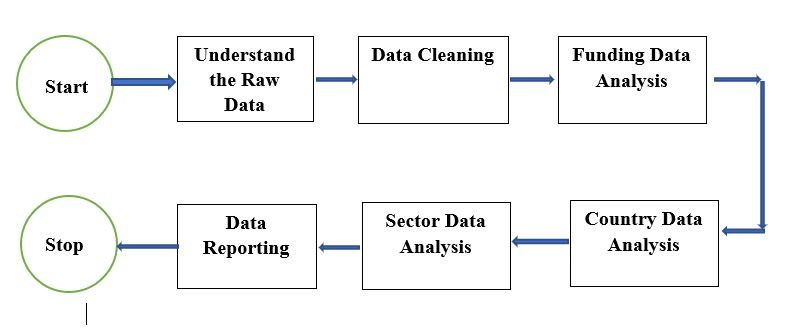

This case study is mainly divided into 3 categories.
1. Funding Type Analysis
2. Country Analysis
3. Sector Analysis

# Problem 1: Data Cleaning 1

In [157]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [158]:

# Creating the companies dataframe
companies = pd.read_csv('F:/teclov/Assignment-4/companies.txt',sep="\t",encoding='latin1')

#Analysing the data
companies.isnull().sum()


permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [159]:

companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [160]:
#Removing special character
companies['permalink']=companies[['permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))
companies['name']=companies.name.str.encode('utf-8').str.decode('ascii', 'ignore')

In [161]:
# Creating rounds2 dataframe
rounds2 = pd.read_csv('F:/teclov/Assignment-4/rounds2.csv',encoding='latin1') #as it is comma seperated, no need to specify seperater

In [162]:
#Analysing the data
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [163]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [164]:
# Removing the special characters in company_permalink and funding_round_permalink column

rounds2['company_permalink']=rounds2[['company_permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))
rounds2['funding_round_permalink']=rounds2[['funding_round_permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))

In [165]:
# Converting the columns ( company_permalink in round2 and permalink & name in companies) to lowercase to avoid duplicacy due to different case
rounds2.company_permalink = rounds2.company_permalink.apply(lambda x: x.lower())

In [166]:
# doing the same for companies permalink
companies.permalink = companies.permalink.apply(lambda x: x.lower())
companies['name']=companies['name'].str.lower()

In [167]:
len(rounds2.company_permalink.unique())

66368

Que: How many unique companies are present in rounds2? 
Ans: 66368

In [168]:
## Cleaning the name column, assigning the name of the company to the NaN cell, as there is only one and we can get the name from its permalink.

companies.loc[companies['permalink']=='/organization/tell-it-in',['name']]=' '.join(companies[companies['permalink']=='/organization/tell-it-in']['permalink'].str.split('/').tolist()[0][2].split('-'))


Question. In the companies data frame, which column can be used as the  unique key for each company?
          Write the name of the column?
Answer: permalink

In [169]:
companies.groupby('name')['name'].nunique().count()

66038

Question. How many unique companies are present in companies file?
Answer: 66038

In [170]:
companies.loc[~rounds2.company_permalink.isin(companies.permalink)]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


Question. Are there any companies in the rounds2 file which are not present in companies?
Answer: No

In [171]:
master_frame = pd.merge(rounds2,companies, left_on="company_permalink", right_on="permalink", how='left')

In [172]:
master_frame.shape

(114949, 16)

# Table 1.1: Understand the Data Set
1. How many unique companies are present in rounds2? 66368
2. How many unique companies are present in companies file? 66038
3. In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.
Answer: permalink

4. Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: No

Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame.How many observations are present in master_frame? There are 114949 rows, 16 columns

# Problem 2: Funding Type Analysis

This is the first of the three goals of data analysis – investment type analysis.
The funding types such as seed, venture, angel, etc. depend on the type of the
company (startup, corporate, etc.), its stage (early stage startup, funded startup,
etc.), the amount of funding (a few million USD to a billion USD), and so on. For
example, seed, angel and venture are three common stages of startup funding.
1)Seed/angel funding refer to early stage startups whereas venture funding
occurs after seed or angel stage/s and involves a relatively higher amount of
investment.
2)Private equity type investments are associated with much larger companies
and involve much higher investments than venture type. Startups which have grown in scale may also receive private equity funding. This means that if a
company has reached the venture stage, it would have already passed
through the angel or seed stage/s.

Teclov wants to choose one of these four investment types for each potential
investment they will make.

Considering the constraints of Teclov, you have to decide one funding type which is
most suitable for them.
1. Calculate the most representative value of the investment amount for
each of the four funding types (venture, angel, seed, and private equity) and
report the answers in the template provided on the previous page
2. Based on the most representative investment amount calculated above, which
investment type do you think is the most suitable for Teclov?

Considering that Teclov wants to invest between 5 to 15 million USD per investment
round, which investment type is the most suitable for it? Identify the investment type
and, for further analysis, filter the data so it only contains the chosen investment
type.

In [173]:
#Data Cleaning
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

'funding round code' column have maximum null entries with 72.91% null values. We will be removing such rows/null values to clean this dataframe for the analysis.

In [174]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           0
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [175]:
# Removing the entries where status is closed as there is no investment going to happen for these companies.
master_frame = master_frame[master_frame['status']!='closed']

In [176]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/organization/01games-technology,01games technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [177]:
master_frame[master_frame['raised_amount_usd'].isna()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
14,/organization/1,/funding-round/5de6d8828aef7d925d97918d15727670,undisclosed,NaN,05-02-2013,NaN,/organization/1,one inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
17,/organization/1-4-all,/funding-round/e97a192e13ea0ee3c4f71136b4f3ec16,equity_crowdfunding,NaN,21-04-2013,NaN,/organization/1-4-all,1-4 all,NaN,Entertainment|Games|Software,operating,USA,NC,NC - Other,Connellys Springs,NaN
18,/organization/1-618-technology,/funding-round/83b8f4c7d37ecef5e001a5e953bf461a,equity_crowdfunding,NaN,22-01-2014,NaN,/organization/1-618-technology,1.618 technology,http://www.Homeandcondogallery.com,Networking|Real Estate|Web Hosting,operating,USA,FL,Orlando,Orlando,07-12-2013
19,/organization/1-800-dentist,/funding-round/5274aacc211163fc7c86539ce94bbacc,undisclosed,NaN,19-08-2010,NaN,/organization/1-800-dentist,1-800-dentist,http://www.1800dentist.com,Health and Wellness,operating,USA,CA,Los Angeles,Los Angeles,01-01-1986
33,/organization/1000lookz,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22-07-2013,NaN,/organization/1000lookz,1000lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008
40,/organization/1000museums-com,/funding-round/6dcccfea326e6add866bf67aafb0a7df,convertible_note,NaN,01-12-2014,NaN,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008
42,/organization/1000museums-com,/funding-round/adf2f3272af9f552b87e01f10f0b9234,venture,NaN,01-02-2014,NaN,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008
51,/organization/1006-tv,/funding-round/a3631227d5232aa8c2303f252c4f1f87,angel,NaN,01-01-2011,NaN,/organization/1006-tv,1006.tv,http://www.1006.tv/,Games|Media,operating,CHN,22,Beijing,Beijing,01-01-2009


In [178]:
master_frame.shape

(106224, 16)

In [179]:
master_frame[master_frame.status == 'closed']

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [180]:
# Removing all the rows where 'raised_amount_usd' is null. This will impact the average and other calculations.
master_frame = master_frame[pd.notnull(master_frame['raised_amount_usd'])]

In [181]:
master_frame.shape

(87903, 16)

In [182]:
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         70.21
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                4.31
category_list               0.72
status                      0.00
country_code                5.26
state_code                  7.10
region                      6.50
city                        6.50
founded_at                 15.82
dtype: float64

In [183]:
len(master_frame.name.unique())

48814

In [184]:
# Converting the amounts of 'raised_amount_usd' column from $ to million $ for easier calculation and understandability.
master_frame['raised_amount_usd']=master_frame['raised_amount_usd'].apply(lambda val: round(val/1000000,3))

In [185]:
# Renaming the column for obvious reason
master_frame=master_frame.rename(columns = {'raised_amount_usd':'raised_amount_mil_usd'})

In [186]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,0.700,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3.407,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,0.041,/organization/01games-technology,01games technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,0.043,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,0.719,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3.000,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20.000,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1.700,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [187]:
master_frame.groupby('funding_round_type')['raised_amount_mil_usd'].mean()

funding_round_type
angel                      0.979917
convertible_note           1.479851
debt_financing            17.774072
equity_crowdfunding        0.519852
grant                      4.154310
non_equity_assistance      0.402853
post_ipo_debt            174.609345
post_ipo_equity           84.233854
private_equity            75.575805
product_crowdfunding       1.411511
secondary_market          91.439808
seed                       0.738591
undisclosed               18.837079
venture                   11.895604
Name: raised_amount_mil_usd, dtype: float64

In [188]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,0.700,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3.407,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,0.041,/organization/01games-technology,01games technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,0.043,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,0.719,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3.000,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20.000,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1.700,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [189]:
master_frame[master_frame['country_code'].isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3.407,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
32,/organization/1000chi,/funding-round/854fae13c5b26b2ea6b32b06c2e5890c,angel,NaN,01-04-2010,43.924,/organization/1000chi,beijing 1000chi software technology,http://www.1000chi.com/,Mobile,operating,NaN,NaN,NaN,NaN,01-01-2008
66,/organization/10k-2,/funding-round/95401c8e8336892bf375ad94efd6c725,seed,NaN,04-09-2015,0.100,/organization/10k-2,beans around,http://beansaround.com/,Coffee|Delivery|Subscription Service,operating,NaN,NaN,NaN,NaN,01-04-2015
95,/organization/1234enter,/funding-round/6343322ed785252d4c5ada444fa7d8e4,venture,NaN,22-11-2013,0.150,/organization/1234enter,1234enter,http://www.1234enter.com.br,Advertising|Analytics|Business Services|E-Comm...,operating,NaN,NaN,NaN,NaN,01-01-2012
96,/organization/1234enter,/funding-round/ee6f9dea78c9a0697a500098a854564d,seed,NaN,01-09-2012,0.500,/organization/1234enter,1234enter,http://www.1234enter.com.br,Advertising|Analytics|Business Services|E-Comm...,operating,NaN,NaN,NaN,NaN,01-01-2012
100,/organization/123greetings,/funding-round/5dd1821a92088ff96b467eb16431731a,venture,NaN,23-07-2015,5.400,/organization/123greetings,123greetings,http://www.123greetings.com/,Internet,operating,NaN,NaN,NaN,NaN,01-05-1997
127,/organization/15minutesnow,/funding-round/9352dd0999084c880e8f62cbe3a2095e,seed,NaN,10-05-2011,0.200,/organization/15minutesnow,15minutesnow,http://15minutesnow.com,Games,operating,NaN,NaN,NaN,NaN,19-04-2011
133,/organization/17-media,/funding-round/f8ffde9fa822843ac6ea9b66cc615df1,venture,A,05-11-2015,10.000,/organization/17-media,17 media,http://17.media,NaN,operating,NaN,NaN,NaN,NaN,15-07-2015
145,/organization/1800diapers,/funding-round/5e2b8cd8ad0dcdff961fd09dee78d487,venture,B,04-12-2007,7.000,/organization/1800diapers,1800diapers,NaN,Baby Accessories|Kids,operating,NaN,NaN,NaN,NaN,NaN
173,/organization/1lay,/funding-round/0008af0992808995558ed19069bc14e6,seed,NaN,02-11-2015,0.210,/organization/1lay,1lay,http://1lay.com,Mobile|Mobile Devices|Mobile Security|Security...,operating,NaN,NaN,NaN,NaN,18-07-2013


In [190]:
master_frame.category_list.isna().count()

87903

In [191]:
master_frame.shape

(87903, 16)

In [192]:
# Removing null value rows for the country code column. The analysis will also be based in countries.
master_frame = master_frame[pd.notnull(master_frame['country_code'])]

In [193]:
master_frame.shape

(83277, 16)

In [194]:
len(master_frame.name.unique())

45289

In [195]:
master_frame.groupby('funding_round_type')['raised_amount_mil_usd'].mean()

funding_round_type
angel                      0.994756
convertible_note           1.340013
debt_financing            17.891010
equity_crowdfunding        0.511266
grant                      4.286176
non_equity_assistance      0.460610
post_ipo_debt            175.469739
post_ipo_equity           67.093605
private_equity            75.797196
product_crowdfunding       1.521047
secondary_market          94.089400
seed                       0.763097
undisclosed               16.018211
venture                   11.903153
Name: raised_amount_mil_usd, dtype: float64

From the above analysis we can makeout following observations:
1. Average funding amount of venture type:
    11.90 Million Dollars
2. Average funding amount of angel type:
     0.99 Million Dollars
3. Average funding amount of seed type:
    0.76 Million Dollars
4. Average funding amount of private equity type:
    75.80 Million Dollars

In [196]:
#Considering only funding type where invest is between 5 to 15 million dollar.

master_frame.groupby('funding_round_type')['raised_amount_mil_usd'].mean().between(5.0,15.0,inclusive=True)

funding_round_type
angel                    False
convertible_note         False
debt_financing           False
equity_crowdfunding      False
grant                    False
non_equity_assistance    False
post_ipo_debt            False
post_ipo_equity          False
private_equity           False
product_crowdfunding     False
secondary_market         False
seed                     False
undisclosed              False
venture                   True
Name: raised_amount_mil_usd, dtype: bool

In [197]:
master_frame_vent = master_frame[master_frame.funding_round_type == 'venture']

# From the above analysis we can observed that, the best investment type is Venture Type as Teclov wants to invest  between 5 to 15 million USD per investment round, so we will proceed ahead with venture type  for our further analysis.
So we have to Create  a new dataframe with name 'master_frame_vent' for the same.

# Problem 3: Country Analysis

This is the second goal of analysis — country analysis.

Now that you know the type of investment suited for Teclov, let's narrow down the
countries.
Teclov wants to invest in countries with the highest amount of funding for the chosen
investment type. This is a part of its broader strategy to invest where most
investments are occurring.

1. Teclov wants to see the top nine countries which have received the highest
total funding (across ALL sectors for the chosen investment type)
2. For the chosen investment type, make a data frame named top9 with the top
nine countries (based on the total investment amount each country has
received)

Identify the top three English-speaking countries in the data frame top9.

In [198]:
master_frame_vent.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         19874
funded_at                      0
raised_amount_mil_usd          0
permalink                      0
name                           0
homepage_url                1983
category_list                201
status                         0
country_code                   0
state_code                   696
region                       549
city                         549
founded_at                  7506
dtype: int64

In [199]:
#creating a data frame named top9 with the top nine countries
top9 = master_frame_vent.groupby('country_code',as_index=False)['raised_amount_mil_usd'].sum().sort_values(by = ['raised_amount_mil_usd'],ascending=False).head(9)
top9['Rank'] = range(1,10)
top9.set_index(['Rank'],inplace = True)


In [200]:
master_frame_vent

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,0.719,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20.000,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1.700,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8.900,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5.000,/organization/1-mainstream,1 mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4.000,/organization/10-minutes-with,10 minutes with,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2.520,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010
38,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,NaN,14-10-2009,0.266,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008


In [201]:
top9

,country_code,raised_amount_mil_usd
Rank,,
1,USA,399935.179
2,CHN,39101.773
3,GBR,18241.345
4,IND,14050.604
5,CAN,8825.477
6,FRA,6775.039
7,ISR,6503.020
8,DEU,6061.141
9,JPN,3242.031


Table 3.1: Analysing the Top 3 English-Speaking Countries
    For this we will be referring to the pdf given which includes list of countries where english is official language
    So by referring to this pdf  and top9 dataframe we can make following conclusion
    

1. Top English-speaking country : USA
2. Second English-speaking country : GBR
3. Third English-speaking country :IND

Now you also know the three most investment-friendly countries and the most suited
funding type for Teclov. Let us now focus on finding the best sectors in these
countries.

# Problem 4: Sector Analysis 1

This is the third goal of analysis — sector analysis.
When we say sector analysis, we refer to one of the eight main sectors listed in the
mapping file (note that ‘Other’ is one of the eight main sectors; also, there are eight
sectors if you consider the category 'Blanks' as a missing value). This is to simplify
the analysis by grouping the numerous category lists (named ‘category_list’) in the mapping file. For example, in the mapping file, category_lists such as ‘3D’, ‘3D
Printing’, ‘3D Technology’, etc. are mapped to the main sector ‘Manufacturing’. Also, for some companies, the category list is a list of multiple sub-sectors separated
by a pipe (vertical bar |). For example, one of the companies’ category_list is
Application Platforms|Real Time|Social Network Media.

You discuss with the CEO and come up with the business rule that the first string
before the vertical bar will be considered the primary sector. In the example above,
‘Application Platforms’ will be considered the primary sector.

1. Extract the primary sector of each category list from the category_list
column
2. Use the mapping file 'mapping.csv' to map each primary sector to one of the
eight main sectors (Note that ‘Others’ is also considered one of the main
sectors)

Expected Results: Code for a merged data frame with each primary sector mapped
to its main sector (the primary sector should be present in a separate column).

In [202]:
mapping=pd.read_csv('F:/teclov/Assignment-4/mapping.csv')

In [203]:
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [204]:
mapping.isna().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [205]:
# Creating the first category as the primary category from master_frame_vent.
pr_sector = master_frame_vent['category_list'].str.split('|',n=1,expand=True)

In [206]:
pr_sector

,0,1
0,Media,None
4,Curated Web,None
8,Biotechnology,None
10,Analytics,None
11,Analytics,None
12,Analytics,None
22,Apps,Cable|Distribution|Software
28,Education,None
34,Curated Web,None
38,Curated Web,None


In [207]:
type(pr_sector)

pandas.core.frame.DataFrame

In [208]:
# Filling the 'Primary_Sector' column with the extrated category values.
master_frame_vent['Primary_Sector']=pr_sector[0]

In [209]:
# Analysied the mappings data frame. Found the Replacing 0 in the category list entries 
mapping['category_list']=mapping['category_list'].str.replace('0','na')

In [210]:
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [211]:
# Using melt function from Pandas library. Using 'category_list' as the column in front of which we will need to get the columns containing 1.
# This actually prints all the column names containing 1s and 0s also.
melted=pd.melt(mapping, id_vars=['category_list'],value_vars=['Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'])

In [212]:
# the conlumn names can be seen here getting top 10 columns
melted.head(10)

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0
5,Active Lifestyle,Automotive & Sports,0
6,Ad Targeting,Automotive & Sports,0
7,Advanced Materials,Automotive & Sports,0
8,Adventure Travel,Automotive & Sports,1
9,Advertising,Automotive & Sports,0


In [213]:
# We need only those column entries which have 1 in the respective cells.
melted=melted[melted.value==1]

In [214]:
# Changing column names
melted=melted.rename(columns={'category_list':'Primary_Sector','variable':'main_sector'})

In [215]:
melted

,Primary_Sector,main_sector,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
57,Bicycles,Automotive & Sports,1
69,Boating Industry,Automotive & Sports,1
87,CAD,Automotive & Sports,1
93,Cars,Automotive & Sports,1
188,Design,Automotive & Sports,1


In [216]:
# Dropping the value column as it is not necessary.
melted=melted.drop('value',axis=1)

In [217]:
# Creating a merged Dataframe master_sector
# Using inner join to gather the entries from 'master_frame_vent' and 'melted' dataframes based on their Primary Sector values.
# There were 176 rows having null values for 'main sector'. So we going  with inner join.

master_sector = pd.merge(master_frame_vent,melted,on='Primary_Sector',how='inner')

In [218]:
master_sector.groupby('main_sector').main_sector.count()

main_sector
Automotive & Sports                          690
Blanks                                       201
Cleantech / Semiconductors                  9274
Entertainment                               2521
Health                                      3742
Manufacturing                               3075
News, Search and Messaging                  5483
Others                                     10680
Social, Finance, Analytics, Advertising     9107
Name: main_sector, dtype: int64

In [219]:
#We are removing Blank main sectors as they are not useful in our analysis. 
#We cannot determine in which sector these invetsments are done

#so simply making count won't help us  in deciding proper Sector.

master_sector=master_sector[master_sector.main_sector!='Blanks']

In [220]:
#Now there are 8 main sectors
master_sector.groupby('main_sector').main_sector.count()

main_sector
Automotive & Sports                          690
Cleantech / Semiconductors                  9274
Entertainment                               2521
Health                                      3742
Manufacturing                               3075
News, Search and Messaging                  5483
Others                                     10680
Social, Finance, Analytics, Advertising     9107
Name: main_sector, dtype: int64

In [221]:
master_sector.shape

(44572, 18)

In [222]:
master_frame_vent.shape

(44949, 17)

In [223]:
master_sector

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15.000,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5.800,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18.000,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5.000,/organization/all-def-digital,all def digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment
5,/organization/audiosocket,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,NaN,02-05-2013,0.650,/organization/audiosocket,audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,Media,Entertainment
6,/organization/audiosocket,/funding-round/4e3a53eec6c609943df752206070b23f,venture,A,02-09-2009,0.750,/organization/audiosocket,audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,Media,Entertainment
7,/organization/audiosocket,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,NaN,15-02-2012,1.582,/organization/audiosocket,audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,Media,Entertainment
8,/organization/babble,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,A,05-02-2009,2.000,/organization/babble,babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,01-12-2006,Media,Entertainment
9,/organization/babble,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,A,12-05-2009,1.250,/organization/babble,babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,01-12-2006,Media,Entertainment


# Problem 5: Sector Analysis 2

Now you have a data frame with each company’s main sector (main_sector) mapped
to it. When we say sector analysis, we refer to one of the eight main sectors.

Also, you know the top three English speaking countries and the most suitable
funding type for Teclov. Let’s call the three countries 'Country 1', 'Country 2' and
'Country 3' and the funding type 'FT'.

Also, the range of funding preferred by Teclov is 5 to 15 million USD.
Now, the aim is to find out the most heavily invested main sectors in each of the
three countries (for funding type FT and investments range of 5-15 M USD).

1. Create three separate data frames D1, D2 and D3 for each of the three
countries containing the observations of funding type FT falling within the 5-15
million USD range. The three data frames should contain:
1. All the columns of the master_frame along with the primary sector and the
main sector
2. The total number (or count) of investments for each main sector in a separate
column
3. The total amount invested in each main sector in a separate column

Using the three data frames, you can calculate the total number and amount of
investments in each main sector.

In [224]:
# Copying only those company details for which investemnts have been been between 5 to 15 milions in a new Dataframe 'master_sector_5M_15M'. 
master_sector_5M_15M = master_sector[master_sector['raised_amount_mil_usd'].between(5.0,15.0,inclusive=True)]

In [225]:
master_sector_5M_15M.shape

(14756, 18)

adding required fields to D1 dataframe as per Sector Analysis 2

1. count_of_invest is total number (or count) of investments for each main sector

2. sum_of_invest is total amount invested in each main sector

Creating D1, D2 and D3 Datarames as per the mentioned requirements in description

In [226]:
#D1 for country 1
D1 = master_sector_5M_15M[master_sector_5M_15M['country_code']=='USA']
D1 = D1.assign(count_of_invest =D1.groupby('main_sector')['main_sector'].transform('count'))
D1 = D1.assign(sum_of_invest =D1.groupby('main_sector')['raised_amount_mil_usd'].transform('sum'))
D1

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector,count_of_invest,sum_of_invest
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5.000,/organization/all-def-digital,all def digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment,531,4602.749
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5.000,/organization/chefs-feed,chefsfeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment,531,4602.749
20,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5.000,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,531,4602.749
21,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5.000,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,531,4602.749
30,/organization/mediabong,/funding-round/9282890ca87072025dc1807f400acee6,venture,B,13-05-2015,5.000,/organization/mediabong,mediabong,http://www.mediabong.com,Media|Semantic Search|Video,operating,USA,NY,New York City,New York,30-05-2011,Media,Entertainment,531,4602.749
33,/organization/newscorporation,/funding-round/8f6d7c4592e43e91e8688ba342bffcb7,venture,NaN,08-01-2010,12.500,/organization/newscorporation,news corp,http://www.newscorp.com,Media|News|Publishing,ipo,USA,NY,New York City,New York,01-01-2013,Media,Entertainment,531,4602.749
34,/organization/nokeena,/funding-round/9225f2db6b1b74892d5de6a8744b94ea,venture,A,08-08-2008,9.400,/organization/nokeena,ankeena networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,Media,Entertainment,531,4602.749
36,/organization/nokeena,/funding-round/fb7a617ed6d1a3203024f0f111417bfb,venture,B,25-06-2009,6.500,/organization/nokeena,ankeena networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,Media,Entertainment,531,4602.749
47,/organization/vadio,/funding-round/e1570c5060bf30b9972a2b0dc0562b02,venture,A,12-05-2015,7.500,/organization/vadio,vadio,http://vadio.com,Media|Mobile|Video,operating,USA,OR,"Portland, Oregon",Portland,NaN,Media,Entertainment,531,4602.749
77,/organization/abilto,/funding-round/3493aef8ac2dd0e24ebe66801dc28fde,venture,B,18-03-2014,6.000,/organization/abilto,abilto,http://www.abilto.com,Curated Web|Health and Wellness|Health Care|In...,operating,USA,NY,New York City,New York,01-01-2008,Curated Web,"News, Search and Messaging",1468,12996.910


In [227]:
#D2 for country 2
D2 = master_sector_5M_15M[master_sector_5M_15M['country_code']=='GBR']
D2 = D2.assign(count_of_invest =D2.groupby('main_sector')['main_sector'].transform('count'))
D2 = D2.assign(sum_of_invest =D2.groupby('main_sector')['raised_amount_mil_usd'].transform('sum'))
D2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector,count_of_invest,sum_of_invest
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15.000,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,53,463.516
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5.800,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,53,463.516
119,/organization/azimo,/funding-round/5eb768935cf9c60b402944b0f476baae,venture,A,11-03-2014,10.000,/organization/azimo,azimo,http://azimo.com,Curated Web|Finance Technology|Financial Servi...,operating,GBR,H9,London,London,29-10-2012,Curated Web,"News, Search and Messaging",66,558.500
130,/organization/basekit-platform,/funding-round/8252cd70860ec66a1c7d13b6a2519dc6,venture,NaN,13-05-2014,7.000,/organization/basekit-platform,basekit,http://www.basekit.com,Curated Web|Internet|Web Design,operating,GBR,H9,London,London,01-01-2008,Curated Web,"News, Search and Messaging",66,558.500
131,/organization/basekit-platform,/funding-round/9ceb098a822fb971db490b23c1067336,venture,NaN,03-02-2014,6.819,/organization/basekit-platform,basekit,http://www.basekit.com,Curated Web|Internet|Web Design,operating,GBR,H9,London,London,01-01-2008,Curated Web,"News, Search and Messaging",66,558.500
132,/organization/basekit-platform,/funding-round/e4643bd0876a25cb878627de50d09fa0,venture,NaN,29-03-2011,6.500,/organization/basekit-platform,basekit,http://www.basekit.com,Curated Web|Internet|Web Design,operating,GBR,H9,London,London,01-01-2008,Curated Web,"News, Search and Messaging",66,558.500
246,/organization/clickandbuy,/funding-round/e6b6e25cc1b4fe83f50b25edb81c62e2,venture,C,01-11-2006,6.378,/organization/clickandbuy,clickandbuy,http://www.clickandbuy.com,Curated Web|Payments,acquired,GBR,H9,London,London,01-03-2000,Curated Web,"News, Search and Messaging",66,558.500
371,/organization/famecount,/funding-round/f9e03800d455fd03294b3978c4ca84da,venture,NaN,11-11-2014,7.464,/organization/famecount,starcount,http://www.starcount.com/,Curated Web,operating,GBR,E2,London,Brighton,01-01-2010,Curated Web,"News, Search and Messaging",66,558.500
642,/organization/mysupermarket,/funding-round/20a3de0a131d495657586a2734b95adf,venture,C,13-10-2010,7.400,/organization/mysupermarket,mysupermarket,http://www.mysupermarket.co.uk,Curated Web,operating,GBR,H9,London,London,01-01-2006,Curated Web,"News, Search and Messaging",66,558.500
643,/organization/mysupermarket,/funding-round/4e220e601ed65a5d6ab04f3cb9717214,venture,A,08-05-2007,6.000,/organization/mysupermarket,mysupermarket,http://www.mysupermarket.co.uk,Curated Web,operating,GBR,H9,London,London,01-01-2006,Curated Web,"News, Search and Messaging",66,558.500


In [228]:
#D3 for country 3
D3 = master_sector_5M_15M[master_sector_5M_15M['country_code']=='IND']
D3 = D3.assign(count_of_invest =D3.groupby('main_sector')['main_sector'].transform('count'))
D3 = D3.assign(sum_of_invest =D3.groupby('main_sector')['raised_amount_mil_usd'].transform('sum'))
D3

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector,count_of_invest,sum_of_invest
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment,32,272.080
121,/organization/babajob,/funding-round/b72eaac5ea12ac0f50573ac3d6d46b8d,venture,B,28-04-2015,10.000,/organization/babajob,babajob,http://www.babajob.com,Curated Web|Information Technology|Services|St...,operating,IND,19,Bangalore,Bangalore,27-08-2007,Curated Web,"News, Search and Messaging",49,408.835
143,/organization/bharat-matrimony,/funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8,venture,B,05-02-2008,11.750,/organization/bharat-matrimony,bharat matrimony,http://www.bharatmatrimony.com,Curated Web|Match-Making,operating,IND,25,Chennai,Chennai,12-03-1969,Curated Web,"News, Search and Messaging",49,408.835
165,/organization/bluestone-com,/funding-round/452a7fc1f34df2d3dcda4e28234bc671,venture,A,24-01-2012,5.000,/organization/bluestone-com,bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,Curated Web,"News, Search and Messaging",49,408.835
167,/organization/bluestone-com,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,B,18-03-2014,10.000,/organization/bluestone-com,bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,Curated Web,"News, Search and Messaging",49,408.835
405,/organization/fourinteractive,/funding-round/a0ef5f6e0c69a9060c1649c076999336,venture,B,01-09-2007,10.000,/organization/fourinteractive,four interactive,http://www.fourint.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2006,Curated Web,"News, Search and Messaging",49,408.835
560,/organization/localbanya,/funding-round/087fbb346606a864c03199ec3189e67b,venture,A,09-01-2014,5.000,/organization/localbanya,localbanya,http://localbanya.com,Curated Web,operating,IND,16,Mumbai,Mumbai,01-05-2012,Curated Web,"News, Search and Messaging",49,408.835
561,/organization/localoye,/funding-round/b56bf538e5e50ae038359a6334862a5a,venture,A,14-04-2015,5.000,/organization/localoye,localoye,http://localoye.com,Curated Web,operating,IND,16,Mumbai,Mumbai,01-01-2013,Curated Web,"News, Search and Messaging",49,408.835
610,/organization/mobikwik,/funding-round/6cb899c717aab8ff314ca4b257124377,venture,A,01-01-2013,5.000,/organization/mobikwik,mobikwik,http://www.mobikwik.com,Curated Web|Internet|Mobile|Mobile Payments|Pa...,operating,IND,10,New Delhi,Gurgaon,01-08-2009,Curated Web,"News, Search and Messaging",49,408.835
617,/organization/money-on-mobile,/funding-round/fe6c80376b0e82118d2716049a1f411c,venture,NaN,16-09-2013,10.000,/organization/money-on-mobile,money on mobile,http://www.money-on-mobile.net,Curated Web|Mobile,operating,IND,16,Mumbai,Mumbai,01-01-2010,Curated Web,"News, Search and Messaging",49,408.835


In [229]:
master_sector_5M_15M[master_sector_5M_15M['main_sector'].isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector


1.Total number of investments (count) for all three countries

In [230]:
D1.shape[0]

11269

In [231]:
D2.shape[0]

582

In [232]:
D3.shape[0]

315

2.Total amount of investment (USD) for all three countries

In [233]:
D1.raised_amount_mil_usd.sum()

100851.886

In [234]:
D2.raised_amount_mil_usd.sum()

5061.262000000001

In [235]:
D3.raised_amount_mil_usd.sum()

2820.674

Analysis for Top three sector based on count of investments
3. Top sector (based on count of investments) for all three countries
4. second-best sector (based on count of investments)
5. Third-best sector (based on count of investments)

In [236]:
#Country 1

top_sector_D1=D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0]
top_sector_D1

'Others'

In [237]:
D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3)

main_sector
Others                                     2765
Social, Finance, Analytics, Advertising    2594
Cleantech / Semiconductors                 2152
Name: main_sector, dtype: int64

In [238]:
second_sector_D1=D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1]
second_sector_D1

'Social, Finance, Analytics, Advertising'

In [239]:
third_sector_D1=D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2]
third_sector_D1

'Cleantech / Semiconductors'

In [240]:
#Country 2
top_sector_D2=D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0]
top_sector_D2


'Others'

In [241]:
second_sector_D2=D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1]
second_sector_D2


'Social, Finance, Analytics, Advertising'

In [242]:
third_sector_D2=D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2]
third_sector_D2

'Cleantech / Semiconductors'

In [243]:
#Country 3
top_sector_D3=D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[0]
top_sector_D3

'Others'

In [244]:
second_sector_D3=D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[1]
second_sector_D3

'Social, Finance, Analytics, Advertising'

In [245]:
third_sector_D3=D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3).index[2]
third_sector_D3

'News, Search and Messaging'

Now we will do analysis for number of investments done in these 3 sectors for all three countries
6. Number of investments in the top sector
7. Number of investments in the second-best sector
8. Number of investments in the third-best sector

In [246]:
# Country 1 Number of investments in the top sector
D1[D1.main_sector == top_sector_D1].shape[0]

2765

In [247]:
#Country 2 Number of investments in the top sector
D2[D2.main_sector == top_sector_D2].shape[0]

141

In [248]:
#Country 3 Number of investments in the top sector
D3[D3.main_sector == top_sector_D3].shape[0]

103

In [249]:
# Country 1 Number of investments in the second-best sector
D1[D1.main_sector == second_sector_D1].shape[0]

2594

In [250]:
# Country 2 Number of investments in the second-best sector
D2[D2.main_sector == second_sector_D2].shape[0]

128

In [251]:
# Country 3 Number of investments in the second-best sector
D3[D3.main_sector == second_sector_D3].shape[0]

59

In [252]:
# Country 1 Number of investments in the third-best sector
D1[D1.main_sector == third_sector_D1].shape[0]

2152

In [253]:
# Country 2 Number of investments in the third-best sector
D2[D2.main_sector == third_sector_D2].shape[0]

115

In [254]:
# Country 3 Number of investments in the third-best sector
D3[D3.main_sector == third_sector_D3].shape[0]

49

9. For the top sector count-wise , which company received the highest investment?

In [255]:
# Country 1
D1[D1.main_sector == top_sector_D1].sort_values(by = 'raised_amount_mil_usd', ascending = False).head(1)['name'].values[0]

'udacity'

In [256]:
# Country 2
D2[D2.main_sector == top_sector_D2].sort_values(by = 'raised_amount_mil_usd', ascending = False).head(1)['name'].values[0]

'tribold'

In [257]:
# Country 3
D3[D3.main_sector == top_sector_D3].sort_values(by = 'raised_amount_mil_usd', ascending = False).head(1)['name'].values[0]

'k-12 techno services'

10. For the second-best sector count-wise, which company received the highest investment?

In [258]:
# Country 1
D1[D1.main_sector == second_sector_D1].sort_values(by = 'raised_amount_mil_usd', ascending = False).head(1)['name'].values[0]

'livefyre'

In [259]:
# Country 2
D2[D2.main_sector == second_sector_D2].sort_values(by = 'raised_amount_mil_usd', ascending = False).head(1)['name'].values[0]

'similarweb'

In [260]:
# Country 3
D3[D3.main_sector == second_sector_D3].sort_values(by = 'raised_amount_mil_usd', ascending = False).head(1)['name'].values[0]

'apnapaisa'

From all above analysis lets summarize sector-wise Investment Analysis in Tabular format

# Table 5.1 : Sector-wise Investment Analysis

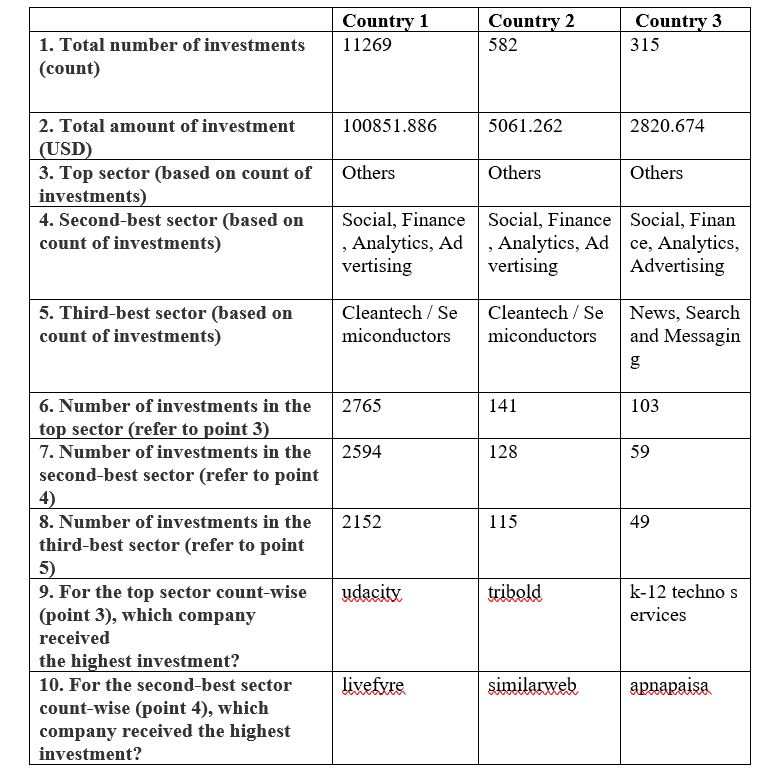

In [261]:
#For getting plots considering only three funding type for analyis
final1 = rounds2.loc[(rounds2.funding_round_type.isin([ "seed","venture","private_equity"])),:]





fundingTypeGroup = final1.groupby("funding_round_type")

fractionInvestment = pd.DataFrame()
fractionInvestment["Fraction of Total Investments"] = (fundingTypeGroup["raised_amount_usd"].sum()/rounds2["raised_amount_usd"].sum() )*100
fractionInvestment["Average Amount of Investments"] = fundingTypeGroup["raised_amount_usd"].mean()
fractionInvestment = fractionInvestment.reset_index()
fractionInvestment






,funding_round_type,Fraction of Total Investments,Average Amount of Investments
0,private_equity,14.334092,7.330859e+07
1,seed,1.715931,7.198180e+05
2,venture,59.601178,1.174895e+07


# Problem 6: Plots


As a final step, you have to present your findings to the CEO of Teclov. Specifically,
she wants to see the following plots:
    1. A plot showing the fraction of total investments (globally) in venture, seed, and
private equity, and the average amount of investment in each funding type.
This chart should make it clear that a certain funding type (FT) is best suited
for Teclov.
2. A plot showing the top 9 countries against the total amount of investments of
funding type FT. This should make the top 3 countries (Country 1, Country 2,
and Country 3) very clear.
3. A plot showing the number of investments in the top 3 sectors of the top 3
countries on one chart (for the chosen investment type FT).
This plot should clearly display the top 3 sectors each in Country 1, Country 2, and
Country 3.
Expected Result: The three plots.

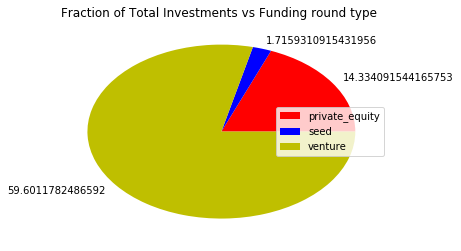

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import pie, axis, show

# plt.figure(figsize=(10,10))
plt.close('all')

 
colors = ['r', 'b', 'y', 'g']


ax1 = plt.axes(frameon=False)
ax1.set_frame_on(False)

labels1 = fractionInvestment["funding_round_type"]
plt.pie(fractionInvestment["Fraction of Total Investments"], colors=colors, labels=fractionInvestment["Fraction of Total Investments"], counterclock=True, shadow=False)
plt.title('Fraction of Total Investments vs Funding round type ')

plt.legend(labels1,loc=5)
plt.show()

The pie chart above shows the fraction of investments in all three funding types globally. 

In [263]:
master_frame=master_frame[master_frame['funding_round_type'].isin(['venture','seed','private_equity'])]



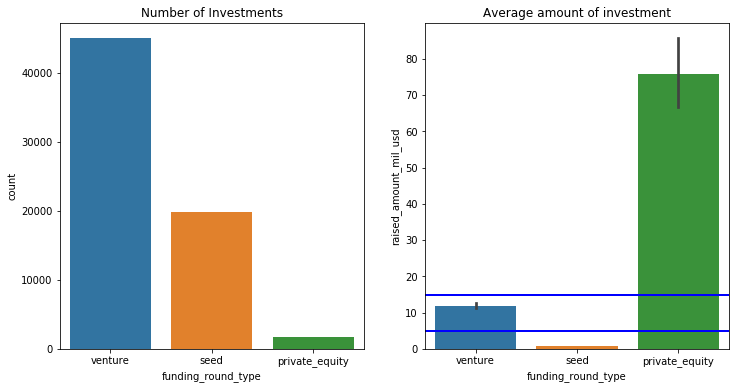

In [264]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="funding_round_type", data=master_frame)
plt.title("Number of Investments")
plt.subplot(1, 2, 2)
sns.barplot(y='raised_amount_mil_usd', x="funding_round_type", data=master_frame)
plt.title("Average amount of investment")

#Drawing the line between 5 to 15 million dollar to get clear picture for Teclov investment analysis

plt.axhline(y=5, linewidth=2, color = 'b')
plt.axhline(y=15, linewidth=2, color = 'b')
plt.show()

Bar chart above  shows the average investment amount in the top 3 funding types. Clearly it can be seen that Venture Type is best suited for Teclov Investment.

In [265]:
top9

,country_code,raised_amount_mil_usd
Rank,,
1,USA,399935.179
2,CHN,39101.773
3,GBR,18241.345
4,IND,14050.604
5,CAN,8825.477
6,FRA,6775.039
7,ISR,6503.020
8,DEU,6061.141
9,JPN,3242.031


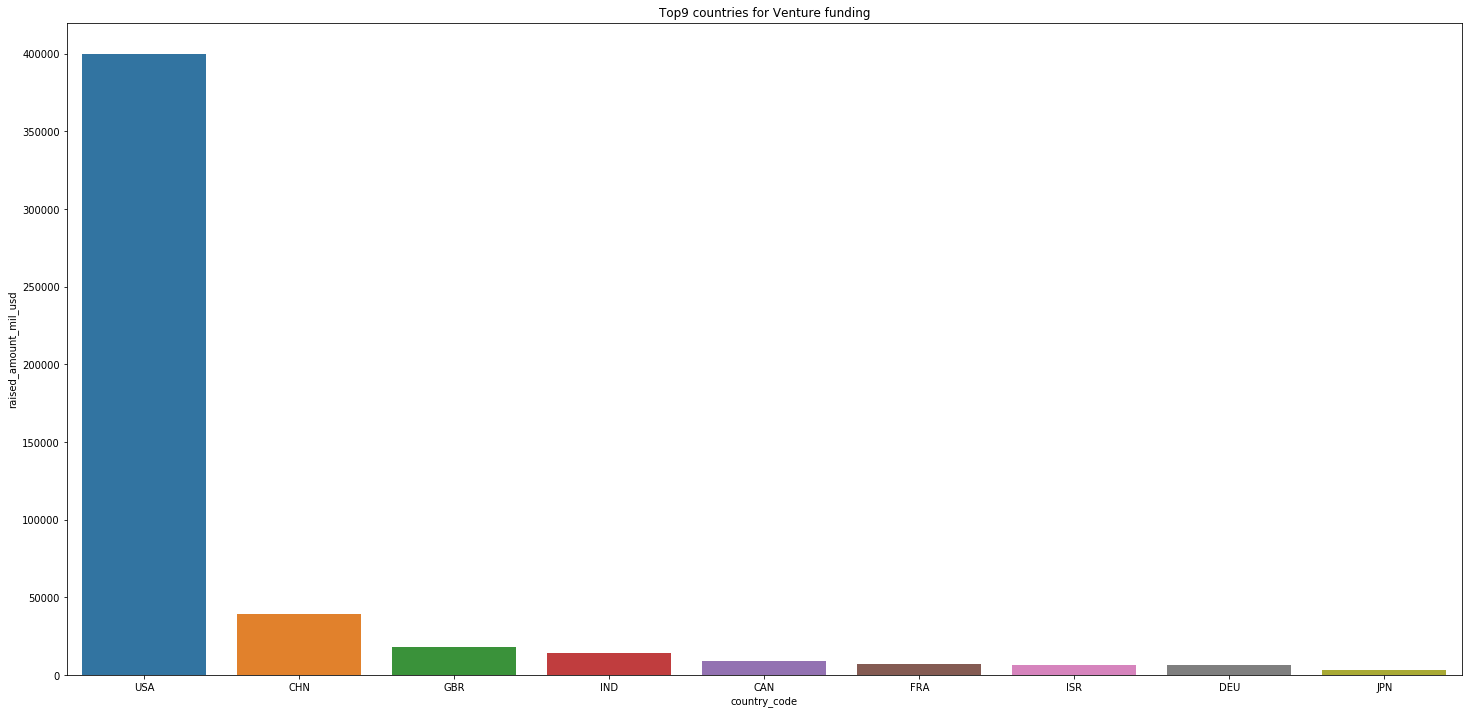

In [266]:
#plotting amount across the top 9 countries
plt.figure(figsize=(25,12))



sns.barplot(x='country_code',y='raised_amount_mil_usd',data=top9)#gives us the sum of raised_amount_usd across those 9 countries.
plt.title('Top9 countries for Venture funding')
plt.show()

The country wise sum of raised amounts in dollar are shown above in bar plot. we can noticed top 3 english speaking countries 

In [267]:
master_frame_vent

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_mil_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,0.719,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20.000,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1.700,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8.900,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5.000,/organization/1-mainstream,1 mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,Apps
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4.000,/organization/10-minutes-with,10 minutes with,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,Education
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2.520,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010,Curated Web
38,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,NaN,14-10-2009,0.266,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,Curated Web


In [268]:
#For getting Total Number of Investments for Top3 countries in Top3 Sectors grouping frames D1 D2 and D3

# The total number (or count) of investments for each main sector in a separate column
D1_grouped = D1.groupby('main_sector')
totalD1Count = D1_grouped.count()
totalD1Count.sort_values(by="permalink",  ascending = False)
D1Frame = pd.DataFrame()
D1Frame["count_of_invest"] = totalD1Count["permalink"]
D1Frame["country_code"] = "USA"

# The total amount invested in each main sector in a separate column
D1Frame["sum_of_invest"] = D1_grouped["raised_amount_mil_usd"].sum().sort_values(ascending = False)
topthreeD1 = D1Frame.sort_values(by='count_of_invest', ascending = False)[0:3]
topthreeD1



,count_of_invest,country_code,sum_of_invest
main_sector,,,
Others,2765,USA,24691.700
"Social, Finance, Analytics, Advertising",2594,USA,22860.775
Cleantech / Semiconductors,2152,USA,19785.534


In [269]:
# The total number (or count) of investments for each main sector in a separate column
D2_grouped = D2.groupby('main_sector')
totalD2Count = D2_grouped.count()
totalD2Count.sort_values(by="permalink",  ascending = False)
D2Frame = pd.DataFrame()
D2Frame["count_of_invest"] = totalD2Count["permalink"]
D2Frame["country_code"] = "GBR"

# The total amount invested in each main sector in a separate column
D2Frame["sum_of_invest"] = D2_grouped["raised_amount_mil_usd"].sum().sort_values(ascending = False)
topthreeD2 = D2Frame.sort_values(by='count_of_invest', ascending = False)[0:3]
topthreeD2

,count_of_invest,country_code,sum_of_invest
main_sector,,,
Others,141,GBR,1230.441
"Social, Finance, Analytics, Advertising",128,GBR,1054.631
Cleantech / Semiconductors,115,GBR,1041.262


In [270]:
# The total number (or count) of investments for each main sector in a separate column
D3_grouped = D3.groupby('main_sector')
totalD3Count = D3_grouped.count()
totalD3Count.sort_values(by="permalink",  ascending = False)
D3Frame = pd.DataFrame()
D3Frame["count_of_invest"] = totalD3Count["permalink"]
D3Frame["country_code"] = "IND"

# The total amount invested in each main sector in a separate column
D3Frame["sum_of_invest"] = D3_grouped["raised_amount_mil_usd"].sum().sort_values(ascending = False)
topthreeD3 = D3Frame.sort_values(by='count_of_invest', ascending = False)[0:3]
topthreeD3

,count_of_invest,country_code,sum_of_invest
main_sector,,,
Others,103,IND,940.290
"Social, Finance, Analytics, Advertising",59,IND,535.549
"News, Search and Messaging",49,IND,408.835


Text(0.5,1,'Total Number of Investments for Top3 countries in Top3 Sectors ')

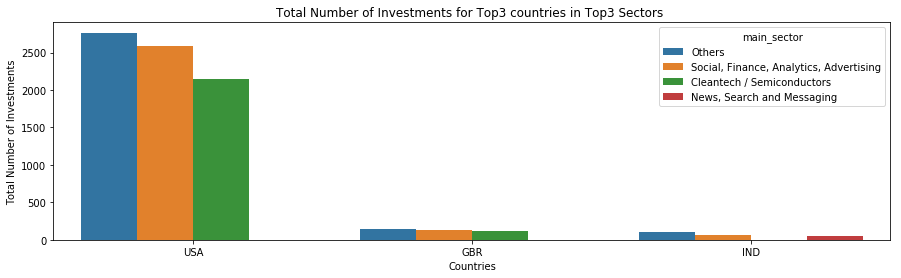

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(num=None, figsize=(15,4),  edgecolor='b')

final2 = pd.concat([topthreeD1,topthreeD2,topthreeD3])
final2 = finaldf.reset_index()

sns.barplot(y="count_of_invest", x="country_code", hue="main_sector", data=final2)
plt.xlabel("Countries")
plt.ylabel("Total Number of Investments")
plt.title("Total Number of Investments for Top3 countries in Top3 Sectors ")

From all above plots and observations Now we will doing further analyis

# ANALYSIS FOR TECLOV INVESTMENT

# 1. Funding Type Analysis:

Analysis made by observing bar plot of number of investments and amount of invetsment and Pie chart depicting Fraction of total invetsments vs Funding round tye.

1. We found that Private Equity, Seed, Angel and Venture Types to be prominent in our analysis.
2. Private Equity has the highest average amount of investment i.e. $75.80 Million USD.
Since it does not fall into the margins set by Teclov Investment, this was not suitable.
3. Venture, seems to be the best funding type as it has average amount investments of 11.9 Million Dollars. 
Also this is the most invested type by number of investments.
Has 60.14% of investments occurring.

# 2. Country Analysis:

By following the above Funding type analyis The Country Analysis is done on Venture Type Funding. Also referring the bar plot of top9 countries for venture funding.
1. If you look into the dataset provided , we can see there are more than 100 countries included. But the major investment was done in a very few countries including USA, China, Great Britain, India, Japan, Germany.
2. China was among the top 3 heavily invested countries, but being a non English speaking country, it was excluded and will not be considered by Teclov Investment to invest in.
3. The amount of investments in USA is about 400 Billion Dollars. The second highest amount of investment is done by china,which is less by  360 Billion Dollar or we can say USA has invested 10 times more than that of China.

# 3. Sector Analysis

Analyis done by observing bar plot of total number of investment for top3 countries in top3 sectors.
1. Having a large number of sectors in the dataset, it was difficult to categorize them. Hence we mapped these sectors with 8 major sectors to make the analysis simpler.
2. Top 3 sectors for the top 3 countries were identified in this case study.
3. It was seen that the prominent sectors for top 3 countries were the same which are
'Others‘
'Cleantech / Semiconductors’
and 'Social/Finance/Analytics/Advertising' in the order

# Conclusions

Based on our analysis of the Investments data we can conclude the following for Teclov Investment Analysis:

1. Best investment type with an average size of investment in the 5-15 M USD range is Venture Capital.
2. Top 3 English Speaking Countries receiving the highest investment amounts in Venture funding types are USA, Great Britain, India
3. The most suitable sectors for funding in the above three countries are 'Others', 'Cleantech/Semiconductors‘ 'Social/Finance/Analytics/Advertising'